<a href="https://colab.research.google.com/github/cm-st-project/flutter-image-classification-tensorflow-lite/blob/main/image_classification_trained_tensorflowLite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tflite_model_maker

     |████████████████████████████████| 616 kB 12.3 MB/s 
     |████████████████████████████████| 1.1 MB 48.0 MB/s 
     |████████████████████████████████| 596 kB 42.5 MB/s 
     |████████████████████████████████| 1.1 MB 43.9 MB/s 
     |████████████████████████████████| 6.4 MB 39.6 MB/s 
     |████████████████████████████████| 87 kB 6.5 MB/s 
     |████████████████████████████████| 77 kB 6.8 MB/s 
     |████████████████████████████████| 840 kB 43.4 MB/s 
     |████████████████████████████████| 1.2 MB 48.6 MB/s 
     |████████████████████████████████| 213 kB 50.4 MB/s 
     |████████████████████████████████| 120 kB 49.7 MB/s 
     |████████████████████████████████| 3.4 MB 47.9 MB/s 
     |████████████████████████████████| 25.3 MB 1.5 MB/s 
     |████████████████████████████████| 99 kB 10.2 MB/s 
     |████████████████████████████████| 47.7 MB 89 kB/s 
     |████████████████████████████████| 352 kB 53.7 MB/s 
     |████████████████████████████████| 210 kB 50.8 MB/s 
  Created wheel for 

In [ ]:
import os
import numpy as np
import tensorflow as tf
assert tf.__version__.startswith('2')
from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader
from tflite_model_maker.image_classifier import ModelSpec
import matplotlib.pyplot as plt

# Download Dataset

After created the dataset, you can zip it and save it in google drive. Then tou can use the next cell to download. The id is in the shared link.  For example:

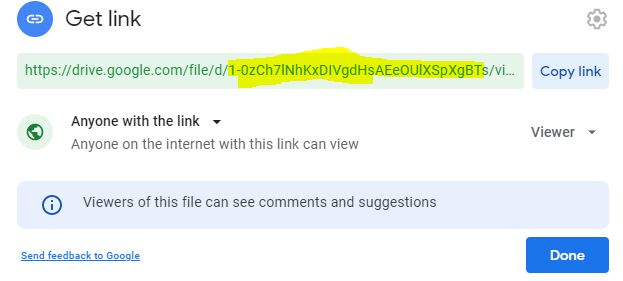


In [ ]:
!gdown --id 1-0zCh7lNhKxDIVgdHsAEeOUlXSpXgBTs #1-0zCh7lNhKxDIVgdHsAEeOUlXSpXgBTs
!unzip /content/trained_images.zip

Downloading...
From: https://drive.google.com/uc?id=1-0zCh7lNhKxDIVgdHsAEeOUlXSpXgBTs
To: /content/trained_images.zip
100% 2.15G/2.15G [00:37<00:00, 56.7MB/s]
Archive:  /content/trained_images.zip
   creating: trained_fruit_images/
   creating: trained_fruit_images/orange_fruit/
  inflating: trained_fruit_images/orange_fruit/26708116454_6a473b70f6_o.jpg  
  inflating: trained_fruit_images/orange_fruit/15071925435_3cff12c7ea_o.jpg  
  inflating: trained_fruit_images/orange_fruit/2671680047_5b1b5ebd3c_o.jpg  
  inflating: trained_fruit_images/orange_fruit/40580294931_7efdb1e8d9_o.jpg  
  inflating: trained_fruit_images/orange_fruit/37634879_b70999efac_o.jpg  
  inflating: trained_fruit_images/orange_fruit/675389705_ed4fe9385f_o.jpg  
  inflating: trained_fruit_images/orange_fruit/2263025120_79c69e5d81_o.jpg  
  inflating: trained_fruit_images/orange_fruit/5225442666_b282a58a62_o.jpg  
  inflating: trained_fruit_images/orange_fruit/2187238971_b9c49c7c04_o.jpg  
  inflating: trained_fruit_

# Trained Model

In [ ]:
data = DataLoader.from_folder('/content/trained_fruit_images')

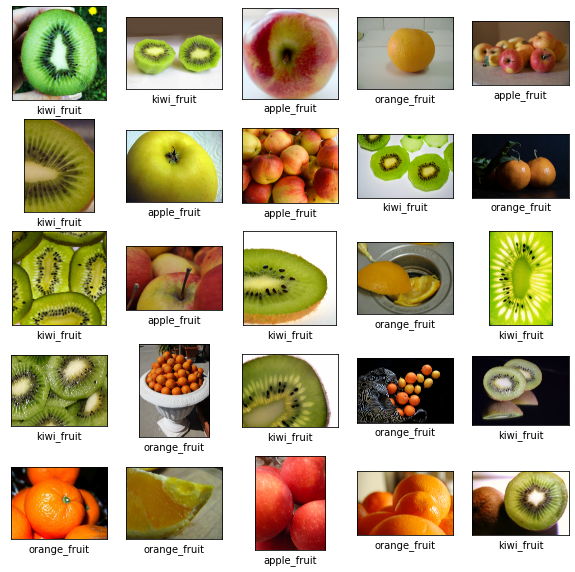

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [ ]:

train_data, test_data = data.split(0.9)
model = image_classifier.create(train_data)
loss, accuracy = model.evaluate(test_data)


INFO:tensorflow:Load image with size: 1488, num_label: 3, labels: apple_fruit, kiwi_fruit, orange_fruit.


INFO:tensorflow:Load image with size: 1488, num_label: 3, labels: apple_fruit, kiwi_fruit, orange_fruit.


INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 3,416,867
Trainable params: 3,843
Non-trainable params: 3,413,024
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/5
41/41 [==============================] - 213s 5s/step - loss: 0.4886 - accuracy: 0.9162
Epoch 2/5
41/41 [==============================] - 199s 5s/step - loss: 0.3599 - accuracy: 0.9855
Epoch 3/5
41/41 [==============================] - 198s 5s/step - loss: 0.3521 - accuracy: 0.9863
Epoch 4/5
41/41 [==============================] - 199s 5s/step - loss: 0.3409 - accuracy: 0.9947
Epoch 5/5
5/5 [==============================] - 68s 5s/step - loss: 0.3459 - accuracy: 0.9866


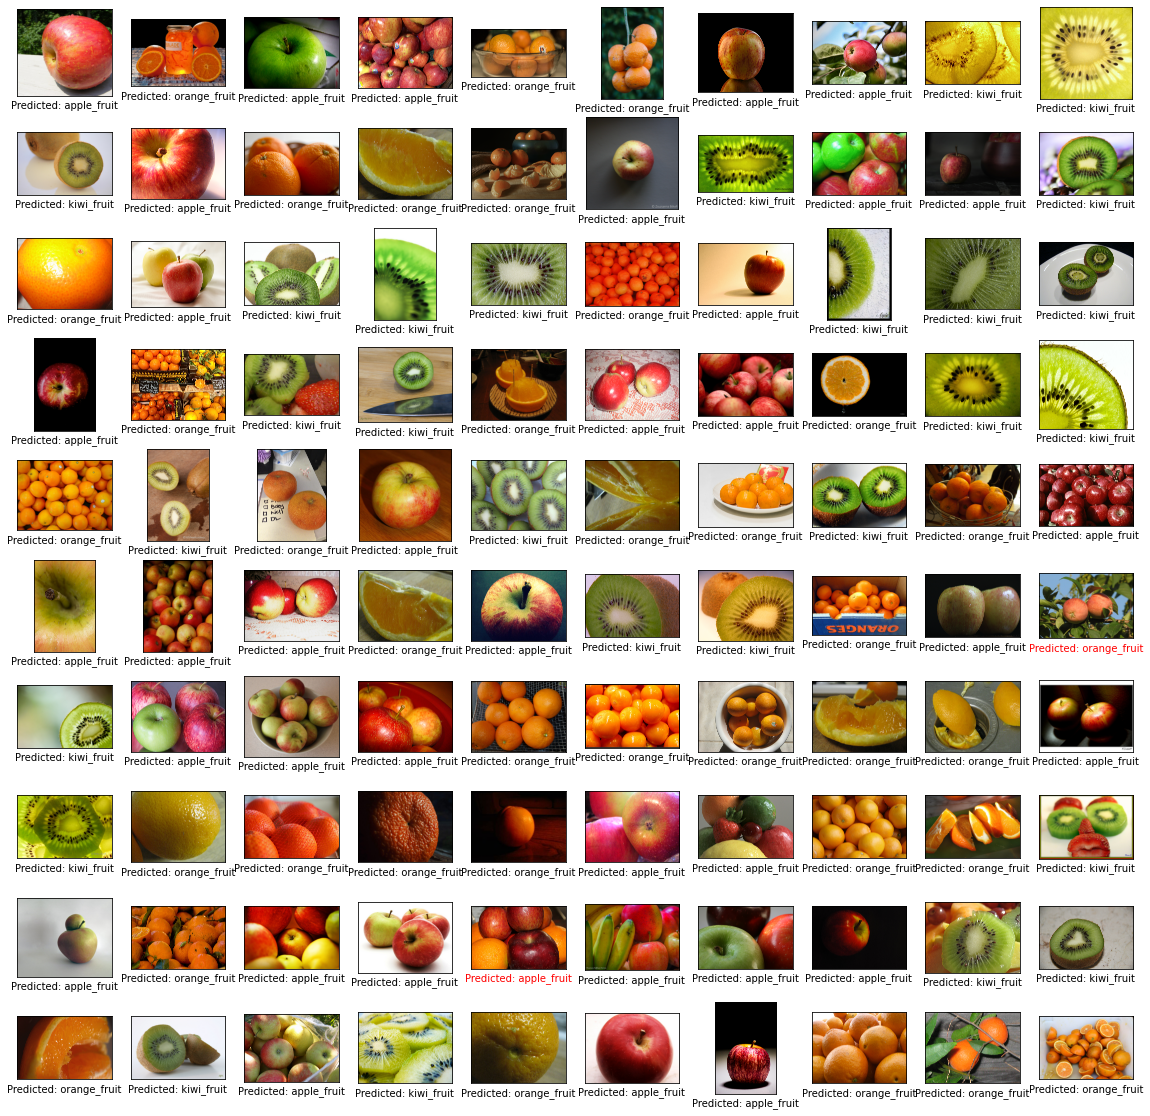

In [ ]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

# Export Model

After exporting the model, you need to download the label.txt and model.tflite 

In [ ]:
model.export(export_dir='.')
model.export(export_dir='.', export_format=ExportFormat.LABEL)

#Generate Dataset
Source: https://github.com/ultralytics/flickr_scraper

In [ ]:
! git clone https://github.com/ultralytics/flickr_scraper
! pip install -U -r /content/flickr_scraper/requirements.txt


fatal: destination path 'flickr_scraper' already exists and is not an empty directory.


- Request a Flickr API key: https://www.flickr.com/services/apps/create/apply

- Write your API key and secret in flickr_scraper.py L11-L12:
  

```
   key = ''
   secret = ''
```

- Restart the runtime


In [ ]:
def generate_images(keywords:list, samples:int):
  !python3 /content/flickr_scraper/flickr_scraper.py --search '$keywords' --n "$samples" --download
  #794292b0cffb6e32b0085b9293fa1fda
  #90e44ed990ac2644

##Mount Google Drive

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

## Zip dataset

In [ ]:
%cd /content/gdrive/MyDrive
!zip -r training.zip images/
#'eg.:!zip -r test_images.zip dataset_images/'

In [ ]:
!ls